# Proyek Klasifikasi Gambar: Mendeteksi Emosi Wajah
- **Nama:** Mighdad
- **Email:** mr.mighdadfattah@gmail.com
- **ID Dicoding:** mighdad

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install matplotlib rich

In [2]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image
import os
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from PIL import Image

import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
import os
from sklearn.model_selection import train_test_split
import os
import shutil
from tensorflow.keras.callbacks import TensorBoard
import datetime

import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table
from rich.panel import Panel


## Data Preparation

### Data Loading

In [ ]:
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset
!unzip emotion-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Sad/0a12a7e998fa7abde73e79ce2a74477bdc6f5dd010da05231f4c3330.jpg  
  inflating: dataset/Sad/0a1370fc7e34586d5f134694c9d1e79ed4cce9e59684077ae5061db8.png  
  inflating: dataset/Sad/0a14abb2a25753914205e88e870054918de36219552002f3144b8455.jpg  
  inflating: dataset/Sad/0a15eede4e05e13f70f6540c4167282f9a488cc318005c8693c49433.jpg  
  inflating: dataset/Sad/0a163aa46984ad37b58aa6b8175dca9b1007a3066099d18f4dda6f78.jpg  
  inflating: dataset/Sad/0a1833eb2427bd8c1ddd3b9c020c6233a3671763e21b1e08b5afa41f.jpg  
  inflating: dataset/Sad/0a19842e87935fbd2c45a7042e4bb8d1d3816476e8a6b7e8f41205d8.jpg  
  inflating: dataset/Sad/0a1d613237e9af295213c61e1c2b9d7fd211fad638c522afb9548901.jpg  
  inflating: dataset/Sad/0a1d86074a08f9bf55858cf90eaaee6f1e0362d97f08cbaa161e30e0.jpg  
  inflating: dataset/Sad/0a22b8d3b2fbcbebb6a4be7dad0a37b92983e8afe42b4d48cded4e45.jpg  
  inflating: dataset/Sad/0a285a2a07f0f8daaa0a821e30ad2e558ddc18f2589a

## **Plot gambar sampel untuk semua kelas**

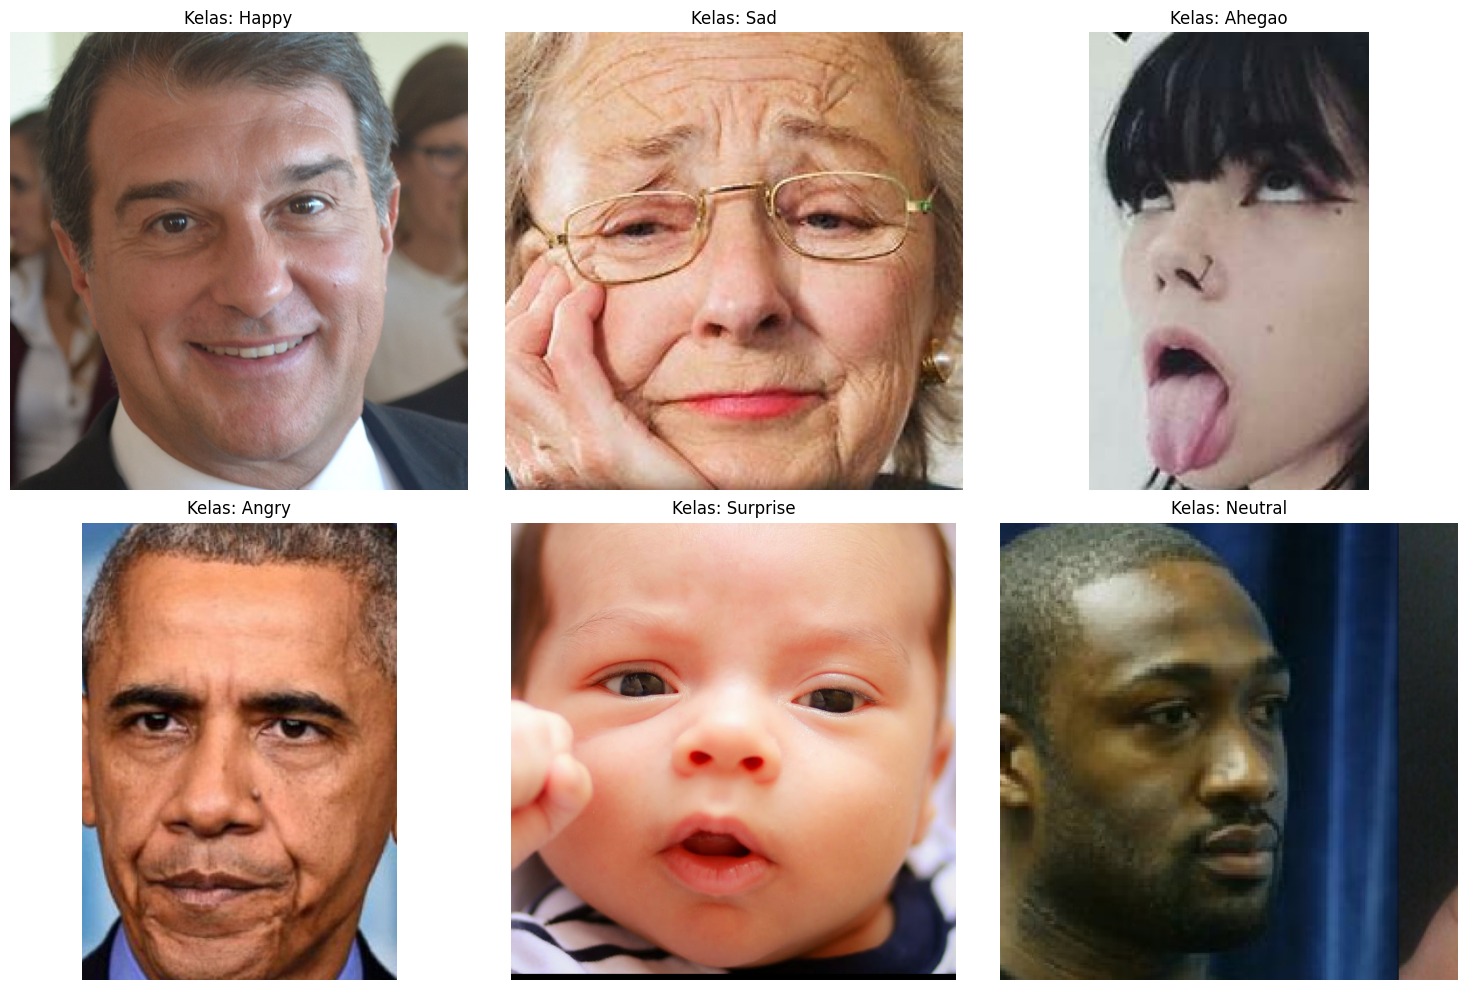

In [ ]:
# Path ke folder dataset
dataset_path = '/content/dataset'

# Daftar kelas
classes = os.listdir(dataset_path)

# Setup plot
plt.figure(figsize=(15, 10))

# Loop melalui setiap kelas
for i, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_path, class_name)

    # Pastikan ini adalah direktori
    if os.path.isdir(class_dir):
        # Ambil daftar gambar di kelas tersebut
        images = os.listdir(class_dir)

        # Pilih gambar secara acak
        random_image = random.choice(images)
        img_path = os.path.join(class_dir, random_image)

        # Baca gambar
        img = image.load_img(img_path)
        img_array = image.img_to_array(img)

        # Plot gambar
        plt.subplot(2, 3, i + 1)  # 2 baris, 3 kolom (sesuaikan dengan jumlah kelas)
        plt.imshow(img_array / 255.0)  # Normalisasi pixel values ke [0, 1]
        plt.title(f'Kelas: {class_name}')
        plt.axis('off')

# Tampilkan plot
plt.tight_layout()
plt.show()

## **Distribusi Gambar Tiap Kelas**

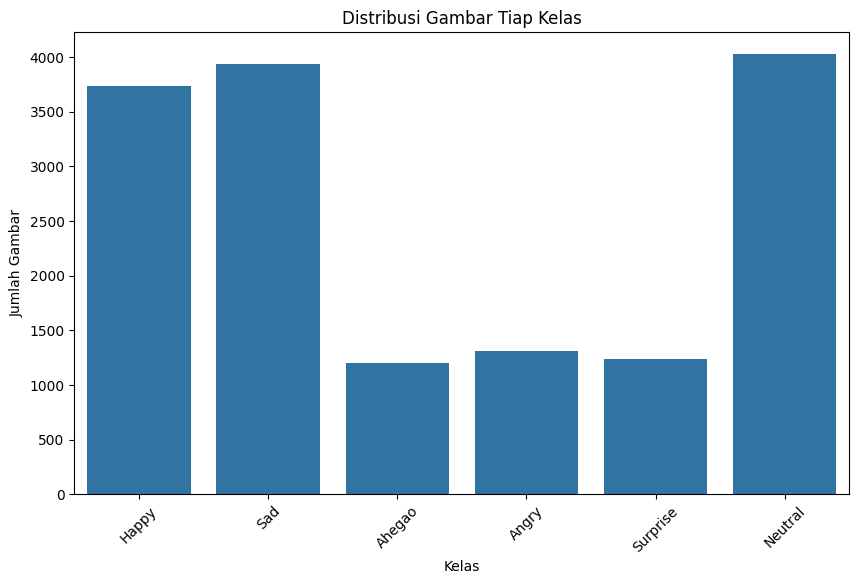

Kelas Happy: 3740 gambar
Kelas Sad: 3934 gambar
Kelas Ahegao: 1205 gambar
Kelas Angry: 1313 gambar
Kelas Surprise: 1234 gambar
Kelas Neutral: 4027 gambar


In [ ]:
# Path ke folder dataset
dataset_path = '/content/dataset'

# Mendapatkan daftar kelas (subfolder) dalam dataset
classes = os.listdir(dataset_path)

# Menghitung jumlah gambar tiap kelas
class_counts = {}
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

# Menampilkan distribusi gambar tiap kelas
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Distribusi Gambar Tiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

# Menampilkan jumlah gambar tiap kelas dalam bentuk teks
for class_name, count in class_counts.items():
    print(f'Kelas {class_name}: {count} gambar')

### Data Augmentation

In [ ]:
# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.flip_up_down(img)
    return img

# Membuat fungsi untuk memberikan efek peningkatan kecerahan pada gambar
def add_brightness(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.adjust_brightness(img, delta=random.uniform(0.1, 0.5))  # Sesuaikan nilai delta sesuai kebutuhan
    return img

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter shearing range
    datagen = ImageDataGenerator(shear_range=0.2)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

# Membuat fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter width_shift_range dan height_shift_range
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

In [ ]:
# Path ke folder dataset
dataset_path = '/content/dataset'

# Kelas yang perlu augmentasi
classes_to_augment = ['Ahegao', 'Angry', 'Surprise']
augmentation_count = 2400  # Jumlah gambar yang ingin ditambahkan per kelas

# Daftar fungsi augmentasi
augmentation_functions = [
    anticlockwise_rotation,
    clockwise_rotation,
    flip_up_down,
    add_brightness,
    sheared,
    warp_shift
]

# Fungsi untuk menyimpan gambar
def save_image(img, path):
    img = tf.keras.preprocessing.image.array_to_img(img)
    img.save(path)

# Loop melalui kelas yang perlu augmentasi
for class_name in classes_to_augment:
    class_dir = os.path.join(dataset_path, class_name)
    images = os.listdir(class_dir)
    num_images = len(images)

    # Loop untuk menghasilkan gambar baru
    for i in range(augmentation_count):
        # Pilih gambar secara acak dari kelas
        random_image = random.choice(images)
        img_path = os.path.join(class_dir, random_image)
        img = tf.keras.preprocessing.image.load_img(img_path)
        img = tf.keras.preprocessing.image.img_to_array(img)

        # Pilih fungsi augmentasi secara acak
        augment_func = random.choice(augmentation_functions)
        augmented_img = augment_func(img)

        # Simpan gambar yang telah di-augmentasi
        new_image_path = os.path.join(class_dir, f'aug_{i}_{random_image}')
        save_image(augmented_img, new_image_path)

    print(f'Augmentasi selesai untuk kelas {class_name}. Ditambahkan {augmentation_count} gambar.')

print('Proses augmentasi selesai!')

Augmentasi selesai untuk kelas Ahegao. Ditambahkan 2400 gambar.
Augmentasi selesai untuk kelas Angry. Ditambahkan 2400 gambar.
Augmentasi selesai untuk kelas Surprise. Ditambahkan 2400 gambar.
Proses augmentasi selesai!


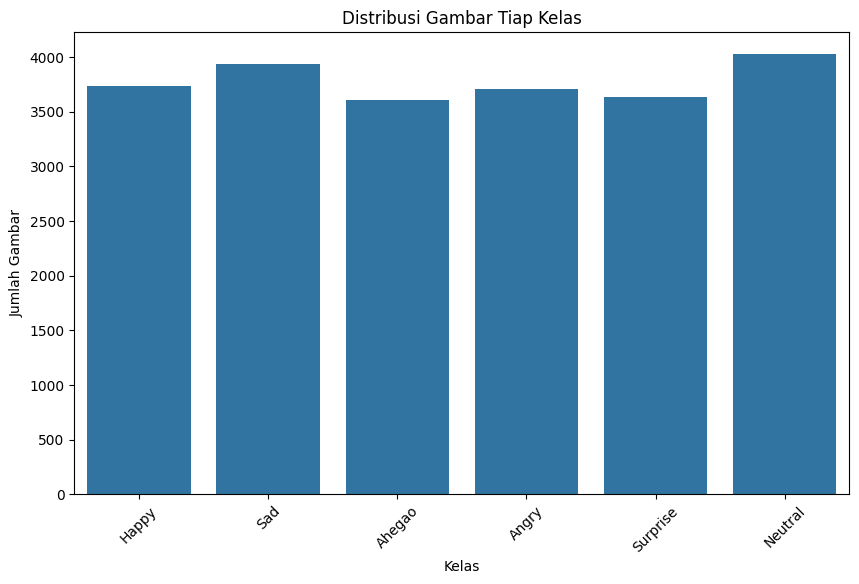

Kelas Happy: 3740 gambar
Kelas Sad: 3934 gambar
Kelas Ahegao: 3605 gambar
Kelas Angry: 3713 gambar
Kelas Surprise: 3634 gambar
Kelas Neutral: 4027 gambar


In [ ]:
# Path ke folder dataset
dataset_path = '/content/dataset'

# Mendapatkan daftar kelas (subfolder) dalam dataset
classes = os.listdir(dataset_path)

# Menghitung jumlah gambar tiap kelas
class_counts = {}
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

# Menampilkan distribusi gambar tiap kelas
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Distribusi Gambar Tiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

# Menampilkan jumlah gambar tiap kelas dalam bentuk teks
for class_name, count in class_counts.items():
    print(f'Kelas {class_name}: {count} gambar')

### Data Preprocessing

#### Split Dataset

In [ ]:
# Path ke folder dataset
dataset_path = '/content/dataset'

# Daftar kelas
classes = os.listdir(dataset_path)

# Inisialisasi list untuk menyimpan path gambar dan label
file_paths = []
labels = []

# Loop melalui setiap kelas
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)

    # Pastikan ini adalah direktori
    if os.path.isdir(class_dir):
        # Ambil daftar gambar di kelas tersebut
        images = os.listdir(class_dir)

        # Tambahkan path gambar dan label ke list
        for image_name in images:
            file_paths.append(os.path.join(class_dir, image_name))
            labels.append(class_name)

# Bagi dataset
X_train, X_temp, y_train, y_temp = train_test_split(file_paths, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {len(X_train)} gambar")
print(f"Validation set: {len(X_val)} gambar")
print(f"Testing set: {len(X_test)} gambar")

Training set: 15857 gambar
Validation set: 3398 gambar
Testing set: 3398 gambar


## Data Generator

In [ ]:
# Fungsi untuk memindahkan file ke folder tujuan
def move_files(file_paths, labels, target_dir):
    for file_path, label in zip(file_paths, labels):
        # Buat folder tujuan jika belum ada
        os.makedirs(os.path.join(target_dir, label), exist_ok=True)

        # Pindahkan file
        shutil.move(file_path, os.path.join(target_dir, label, os.path.basename(file_path)))

# Buat folder train, val, dan test
os.makedirs('/content/dataset/train', exist_ok=True)
os.makedirs('/content/dataset/val', exist_ok=True)
os.makedirs('/content/dataset/test', exist_ok=True)

# Pindahkan file ke folder yang sesuai
move_files(X_train, y_train, '/content/dataset/train')
move_files(X_val, y_val, '/content/dataset/val')
move_files(X_test, y_test, '/content/dataset/test')

print("File berhasil dipindahkan ke folder train, val, dan test.")

File berhasil dipindahkan ke folder train, val, dan test.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Data generator untuk training set
train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',  # Path ke training set
    target_size=(224, 224),    # Resize gambar ke 224x224
    batch_size=128,             # Ukuran batch
    class_mode='categorical'   # Mode klasifikasi multi-kelas
)

# Data generator untuk validation set
val_generator = train_datagen.flow_from_directory(
    '/content/dataset/val',    # Path ke validation set
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

# Data generator untuk testing set
test_generator = val_test_datagen.flow_from_directory(
    '/content/dataset/test',   # Path ke testing set
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

Found 15857 images belonging to 6 classes.
Found 3398 images belonging to 6 classes.
Found 3398 images belonging to 6 classes.


## Modelling

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Unfreeze beberapa lapisan terakhir
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Unfreeze 20 lapisan terakhir
    layer.trainable = False

# Compile model
model.compile(optimizer=RMSprop(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,113,286 (57.65 MB)

 Trainable params: 15,111,750 (57.65 MB)

 Non-trainable params: 1,536 (6.00 KB)

**Callbacks**

In [ ]:
# Callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=15,  # Tambah patience menjadi 15 epoch
    restore_best_weights=True,
    mode='max',
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50,
    callbacks=[checkpoint_callback, early_stopping_callback, lr_scheduler, tensorboard_callback]
)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3376 - loss: 2.9723
Epoch 1: val_accuracy improved from -inf to 0.44742, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 388s 3s/step - accuracy: 0.3380 - loss: 2.9705 - val_accuracy: 0.4474 - val_loss: 2.3461 - learning_rate: 1.0000e-05
Epoch 2/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:44 2s/step - accuracy: 0.4531 - loss: 2.3910
Epoch 2: val_accuracy improved from 0.44742 to 0.46184, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 187ms/step - accuracy: 0.4531 - loss: 2.3910 - val_accuracy: 0.4618 - val_loss: 2.3375 - learning_rate: 1.0000e-05
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4995 - loss: 2.3589
Epoch 3: val_accuracy improved from 0.46184 to 0.64663, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.4998 - loss: 2.3580 - val_accuracy: 0.6466 - val_loss: 1.9287 - learning_rate: 1.0000e-05
Epoch 4/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:42 2s/step - accuracy: 0.5938 - loss: 1.9792
Epoch 4: val_accuracy did not improve from 0.64663
123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - accuracy: 0.5938 - loss: 1.9792 - val_accuracy: 0.6007 - val_loss: 1.9740 - learning_rate: 1.0000e-05
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6092 - loss: 1.9769
Epoch 5: val_accuracy improved from 0.64663 to 0.72266, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.6093 - loss: 1.9765 - val_accuracy: 0.7227 - val_loss: 1.5864 - learning_rate: 1.0000e-05
Epoch 6/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:43 2s/step - accuracy: 0.6719 - loss: 1.7283
Epoch 6: val_accuracy improved from 0.72266 to 0.72326, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 190ms/step - accuracy: 0.6719 - loss: 1.7283 - val_accuracy: 0.7233 - val_loss: 1.5872 - learning_rate: 1.0000e-05
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6615 - loss: 1.8130
Epoch 7: val_accuracy improved from 0.72326 to 0.75481, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.6616 - loss: 1.8126 - val_accuracy: 0.7548 - val_loss: 1.4796 - learning_rate: 1.0000e-05
Epoch 8/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:46 2s/step - accuracy: 0.7500 - loss: 1.6182
Epoch 8: val_accuracy did not improve from 0.75481
123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - accuracy: 0.7500 - loss: 1.6182 - val_accuracy: 0.7452 - val_loss: 1.5250 - learning_rate: 1.0000e-05
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7046 - loss: 1.6620
Epoch 9: val_accuracy did not improve from 0.75481
123/123 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.7046 - loss: 1.6619 - val_accuracy: 0.7470 - val_loss: 1.5077 - learning_rate: 1.0000e-05
Epoch 10/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:45 2s/step - accuracy: 0.6406 - loss: 1.9045
Epoch 10: val_accuracy improved from 0.75481 to 0.76502, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.6406 - loss: 1.9045 - val_accuracy: 0.7650 - val_loss: 1.4491 - learning_rate: 1.0000e-05
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7389 - loss: 1.5514
Epoch 11: val_accuracy did not improve from 0.76502
123/123 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.7389 - loss: 1.5514 - val_accuracy: 0.7455 - val_loss: 1.5183 - learning_rate: 1.0000e-05
Epoch 12/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:44 2s/step - accuracy: 0.6875 - loss: 1.6599
Epoch 12: val_accuracy did not improve from 0.76502
123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - accuracy: 0.6875 - loss: 1.6599 - val_accuracy: 0.7151 - val_loss: 1.6167 - learning_rate: 1.0000e-05
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7656 - loss: 1.4611
Epoch 13: val_accuracy improved from 0.76502 to 0.77945, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.7656 - loss: 1.4611 - val_accuracy: 0.7794 - val_loss: 1.4022 - learning_rate: 1.0000e-05
Epoch 14/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:42 2s/step - accuracy: 0.7109 - loss: 1.6854
Epoch 14: val_accuracy improved from 0.77945 to 0.81250, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 187ms/step - accuracy: 0.7109 - loss: 1.6854 - val_accuracy: 0.8125 - val_loss: 1.3191 - learning_rate: 1.0000e-05
Epoch 15/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7878 - loss: 1.4044
Epoch 15: val_accuracy did not improve from 0.81250
123/123 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.7878 - loss: 1.4043 - val_accuracy: 0.7740 - val_loss: 1.4907 - learning_rate: 1.0000e-05
Epoch 16/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:51 2s/step - accuracy: 0.8594 - loss: 1.2725
Epoch 16: val_accuracy did not improve from 0.81250
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 0.8594 - loss: 1.2725 - val_accuracy: 0.8098 - val_loss: 1.3734 - learning_rate: 1.0000e-05
Epoch 17/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8151 - loss: 1.3266
Epoch 17: val_accuracy did not improve from 0.81250
123/123 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.8150 - loss: 1.3266 - val_accuracy: 0.7981 - val_loss: 1.3346 - learning_rate: 1.0000e

123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 0.8438 - loss: 1.2803 - val_accuracy: 0.8356 - val_loss: 1.2441 - learning_rate: 1.0000e-05
Epoch 19/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8209 - loss: 1.2869
Epoch 19: val_accuracy did not improve from 0.83564
123/123 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.8210 - loss: 1.2868 - val_accuracy: 0.8266 - val_loss: 1.2786 - learning_rate: 1.0000e-05
Epoch 20/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:44 2s/step - accuracy: 0.8203 - loss: 1.3214
Epoch 20: val_accuracy did not improve from 0.83564
123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 182ms/step - accuracy: 0.8203 - loss: 1.3214 - val_accuracy: 0.8263 - val_loss: 1.2806 - learning_rate: 1.0000e-05
Epoch 21/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8376 - loss: 1.2426
Epoch 21: val_accuracy did not improve from 0.83564
123/123 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.8377 - loss: 1.2424 - val_accuracy: 0.8152 - val_loss: 1.3130 - learning_rate: 1.0000e

123/123 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.8735 - loss: 1.1357 - val_accuracy: 0.8576 - val_loss: 1.1755 - learning_rate: 2.0000e-06
Epoch 26/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:45 2s/step - accuracy: 0.9219 - loss: 1.0168
Epoch 26: val_accuracy did not improve from 0.85757
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 187ms/step - accuracy: 0.9219 - loss: 1.0168 - val_accuracy: 0.8573 - val_loss: 1.1796 - learning_rate: 2.0000e-06
Epoch 27/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8819 - loss: 1.1080
Epoch 27: val_accuracy improved from 0.85757 to 0.86148, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.8819 - loss: 1.1080 - val_accuracy: 0.8615 - val_loss: 1.1475 - learning_rate: 2.0000e-06
Epoch 28/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:42 2s/step - accuracy: 0.9219 - loss: 1.0473
Epoch 28: val_accuracy did not improve from 0.86148
123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - accuracy: 0.9219 - loss: 1.0473 - val_accuracy: 0.8609 - val_loss: 1.1496 - learning_rate: 2.0000e-06
Epoch 29/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8829 - loss: 1.1018
Epoch 29: val_accuracy improved from 0.86148 to 0.86629, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8829 - loss: 1.1018 - val_accuracy: 0.8663 - val_loss: 1.1403 - learning_rate: 2.0000e-06
Epoch 30/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:53 2s/step - accuracy: 0.8438 - loss: 1.1495
Epoch 30: val_accuracy did not improve from 0.86629
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 186ms/step - accuracy: 0.8438 - loss: 1.1495 - val_accuracy: 0.8660 - val_loss: 1.1427 - learning_rate: 2.0000e-06
Epoch 31/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8917 - loss: 1.0858
Epoch 31: val_accuracy improved from 0.86629 to 0.86809, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.8917 - loss: 1.0858 - val_accuracy: 0.8681 - val_loss: 1.1360 - learning_rate: 2.0000e-06
Epoch 32/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:46 2s/step - accuracy: 0.9219 - loss: 1.1170
Epoch 32: val_accuracy did not improve from 0.86809
123/123 ━━━━━━━━━━━━━━━━━━━━ 40s 314ms/step - accuracy: 0.9219 - loss: 1.1170 - val_accuracy: 0.8669 - val_loss: 1.1415 - learning_rate: 2.0000e-06
Epoch 33/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8856 - loss: 1.1003
Epoch 33: val_accuracy did not improve from 0.86809
123/123 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8856 - loss: 1.1002 - val_accuracy: 0.8606 - val_loss: 1.1505 - learning_rate: 2.0000e-06
Epoch 34/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:42 2s/step - accuracy: 0.8828 - loss: 1.0321
Epoch 34: val_accuracy did not improve from 0.86809
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 191ms/step - accuracy: 0.8828 - loss: 1.0321 - val_accuracy: 0.8606 - val_loss: 1.1523 - learning_rate: 2.000

123/123 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.8936 - loss: 1.0786 - val_accuracy: 0.8687 - val_loss: 1.1441 - learning_rate: 2.0000e-06
Epoch 36/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:46 2s/step - accuracy: 0.9141 - loss: 1.0390
Epoch 36: val_accuracy did not improve from 0.86869
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 322ms/step - accuracy: 0.9141 - loss: 1.0390 - val_accuracy: 0.8687 - val_loss: 1.1379 - learning_rate: 2.0000e-06
Epoch 37/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8939 - loss: 1.0644
Epoch 37: val_accuracy did not improve from 0.86869
123/123 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8939 - loss: 1.0644 - val_accuracy: 0.8567 - val_loss: 1.1707 - learning_rate: 2.0000e-06
Epoch 38/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:46 2s/step - accuracy: 0.8672 - loss: 1.1494
Epoch 38: val_accuracy did not improve from 0.86869
123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 180ms/step - accuracy: 0.8672 - loss: 1.1494 - val_accuracy: 0.8612 - val_loss: 1.1634 - learning_rate: 2.000

123/123 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9104 - loss: 1.0290 - val_accuracy: 0.8693 - val_loss: 1.1286 - learning_rate: 4.0000e-07
Epoch 44/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:50 2s/step - accuracy: 0.9141 - loss: 1.0273
Epoch 44: val_accuracy did not improve from 0.86929
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 186ms/step - accuracy: 0.9141 - loss: 1.0273 - val_accuracy: 0.8684 - val_loss: 1.1326 - learning_rate: 4.0000e-07
Epoch 45/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9095 - loss: 1.0290
Epoch 45: val_accuracy improved from 0.86929 to 0.87049, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.9095 - loss: 1.0290 - val_accuracy: 0.8705 - val_loss: 1.1309 - learning_rate: 4.0000e-07
Epoch 46/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:44 2s/step - accuracy: 0.9141 - loss: 1.0333
Epoch 46: val_accuracy did not improve from 0.87049
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 186ms/step - accuracy: 0.9141 - loss: 1.0333 - val_accuracy: 0.8705 - val_loss: 1.1325 - learning_rate: 4.0000e-07
Epoch 47/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9067 - loss: 1.0274
Epoch 47: val_accuracy did not improve from 0.87049
123/123 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9068 - loss: 1.0273 - val_accuracy: 0.8696 - val_loss: 1.1308 - learning_rate: 4.0000e-07
Epoch 48/50
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:46 2s/step - accuracy: 0.8672 - loss: 1.1396
Epoch 48: val_accuracy did not improve from 0.87049
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 189ms/step - accuracy: 0.8672 - loss: 1.1396 - val_accuracy: 0.8684 - val_loss: 1.1342 - learning_rate: 4.000

In [ ]:
# Evaluasi model pada testing set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8842 - loss: 1.0944
Test Accuracy: 88.08%


## Evaluasi dan Visualisasi

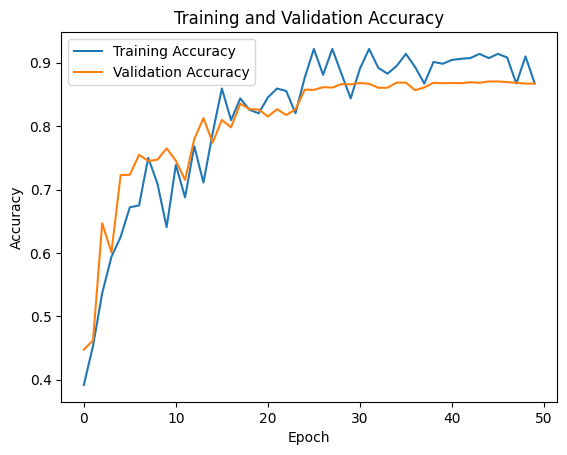

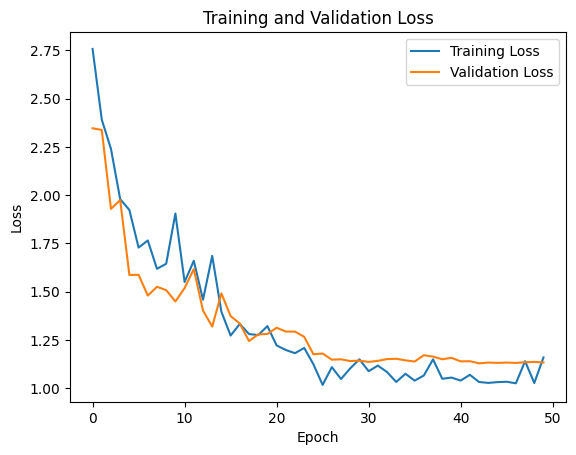

In [ ]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Unduh file best_model.h5 ke komputer lokal
files.download('best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Konversi Model

In [ ]:
# Muat model yang telah disimpan
model = tf.keras.models.load_model('best_model.h5')

# Konversi model ke TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TF-Lite
with open('best_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model telah dikonversi ke TF-Lite dan disimpan sebagai 'best_model.tflite'")

Saved artifact at '/tmp/tmpmlgyfm0p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_17')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  131932206712976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206713552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206712784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206713360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206714704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206713744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206714320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206713936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206716240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206716624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131932206716

## Inference (Optional)

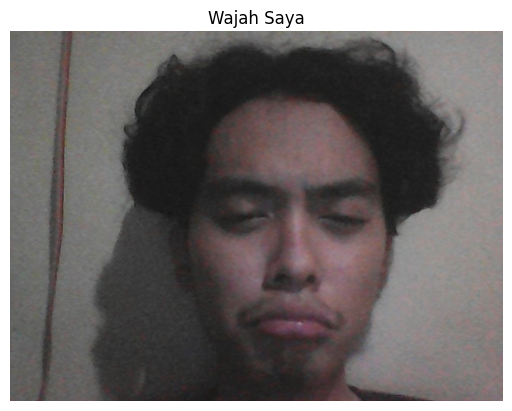

╭──────── Hasil Prediksi Emosi Wajah ─────────╮
│ Emosi yang Diprediksi: Sad                  │
│                                             │
│ <rich.table.Table object at 0x792c777e7790> │
╰─────────────────────────────────────────────╯

In [20]:
# Muat model TF-Lite
interpreter = tf.lite.Interpreter(model_path='best_model.tflite')
interpreter.allocate_tensors()

# Dapatkan input dan output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Fungsi untuk memproses gambar
def preprocess_image(image_path, input_size):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(input_size)
    img_array = np.array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension
    return img_array.astype(np.float32)

# Path ke foto ekspresi wajah Anda
image_path = '/content/foto13.jpg'

# Preprocess gambar
input_size = tuple(input_details[0]['shape'][1:3])  # Ambil ukuran input dari model
input_data = preprocess_image(image_path, input_size)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Lakukan inferensi
interpreter.invoke()

# Dapatkan hasil inferensi
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data)

# Daftar label emosi
emotion_labels = ['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']
predicted_emotion = emotion_labels[predicted_class]

# Tampilkan gambar wajah di konsol
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hilangkan sumbu
plt.title("Wajah Saya")
plt.show()

# Tampilkan hasil prediksi dengan UI/UX yang menarik
console = Console()

# Buat tabel untuk menampilkan hasil prediksi
table = Table(show_header=True, header_style="bold magenta")
table.add_column("Emosi", justify="center")
table.add_column("Probabilitas", justify="center")

for i, emotion in enumerate(emotion_labels):
    probability = output_data[0][i]
    table.add_row(emotion, f"{probability:.2%}")

# Buat panel untuk hasil prediksi
panel = Panel.fit(
    f"[bold green]Emosi yang Diprediksi:[/] [bold yellow]{predicted_emotion}[/]\n\n{table}",
    title="[bold]Hasil Prediksi Emosi Wajah[/]",
    border_style="blue"
)

# Tampilkan panel di konsol
console.print(panel)